

> Entering new AgentExecutor chain...
 Question: Create an image of a cat playing football
Thought: I should generate a prompt describing the scene first.
Action: generate_prompt_api
Action Input: "A black and white cat wearing a football helmet and padding is kicking a soccer ball across a yard. The ball is in the air being kicked by the cat's raised right front paw. In the background is a white house with a picket fence."
Observation:  A black and white cat wearing an American football helmet and shoulder pads is kicking a soccer ball with its raised right front paw in an arched kick across a grass yard on a sunny afternoon. The soccer ball is floating in midair near the top of the kick. In the background, a typical white wooden house with light blue trim and shutters sits at the end of the yard, which is enclosed by a white picket fence. Green trees and blue sky can be seen above the fence and house.
Thought: Question: Create an image of a cat playing football
Thought: I should ge

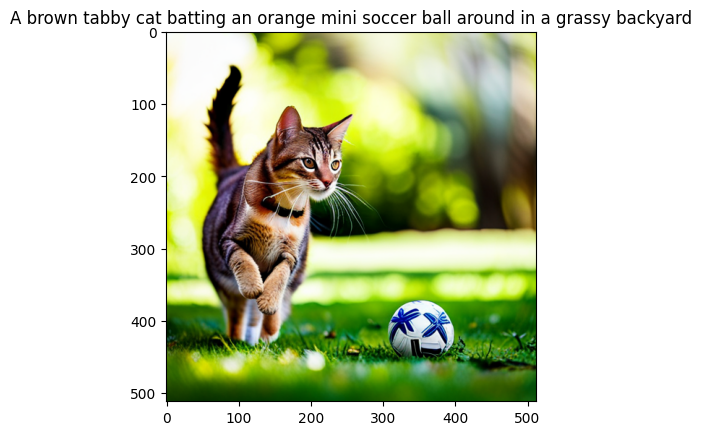

In [99]:
import base64
import io
import re
from PIL import Image
from langchain.llms import Bedrock
from langchain.chains import LLMChain
from langchain.agents import initialize_agent
from langchain.agents import AgentType
from langchain.agents import load_tools
from langchain.tools import tool
from langchain.prompts import PromptTemplate
import os
from langchain_bedrock_image_tool.tool import CustomSearchTool, CustomCalculatorTool
import boto3
import json
import matplotlib.pyplot as plt
from dotenv import load_dotenv

load_dotenv()

session = boto3.Session(profile_name=os.environ.get('profile'))
bedrock_client = session.client('bedrock-runtime')

llm = Bedrock(
    client=bedrock_client,
    model_id="anthropic.claude-instant-v1",
    # model_id="anthropic.claude-v2",
    model_kwargs = {"max_tokens_to_sample": 8000}
)

@tool(return_direct=True)
def generate_image_api(query: str) -> str:
    "Useful for when you need to generate an image with a prompt."
    "Input: A detailed text-2-image prompt describing an image"
    "Output: Image url"
    body = json.dumps({
        "text_prompts": [
            { 
            "text": query 
            }
        ],
        "cfg_scale":10,
        "seed":0,
        "steps":40,
        })
    modelId = "stability.stable-diffusion-xl-v0" 
    accept = "application/json"
    contentType = "application/json"

    response = bedrock_client.invoke_model(
        body=body, modelId=modelId, accept=accept, contentType=contentType
    )
    response_body = json.loads(response.get("body").read())
    base_64_img_str = response_body["artifacts"][0].get("base64")
    img = Image.open(io.BytesIO(base64.decodebytes(bytes(base_64_img_str, "utf-8"))))
    plt.imshow(img)
    plt.title(query[:80])
    return """Some URL"""

@tool
def generate_prompt_api(query: str) -> str:
    "Useful for generating a detailed prompt describing the scene."
    "Input: Some simple query describing the image."
    "Output: Stable diffusion prompts used to generate the image"
    prompt_template = """Give me one good and detailed prompt to generate the image using Stable Diffusion for {query}. The result should just include the prompt. No explanation. Example: <example>H: Give me one good and detailed prompt to generate the image using Stable Diffusion for an animal swimming in a lake. \n\n A: A photo of a brown bear swimming through a large, clear blue mountain lake surrounded by tall evergreen trees and snow capped mountains in the background. The bear is mid-stroke, with its head above the water and its front legs extended. Sparkling sunlight reflects off the smooth water. The image is sharply focused and highly detailed.</example>"""
    llm_chain = LLMChain(
            llm=llm,
            prompt=PromptTemplate.from_template(prompt_template),

        )
    def substring_after(s, delim):
        return s.partition(delim)[2]

    # return substring_after(llm_chain.predict(query=query), ":").strip()
    return llm_chain.predict(query=query)


tools = [generate_image_api, generate_prompt_api]

mrkl = initialize_agent(
    tools, llm, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=True, max_iterations=5,
)

# template = """Answer the following questions as best you can. Try to response in short sentences without explanation. Try not use a single tool repeatedly. You have access to the tools inside <tools></tools> XML tags:
# <tools>
# generate_image_api: generate_image_api(query: str) -> str - Useful for when you need to generate an image. 
# generate_prompt_api: generate_prompt_api(query: str) -> str - Useful for generating a Stable Diffusion prompt. 
# </tools>

# Use the following format:
# Question: the input question you must answer
# Thought: you should always think about what to do
# Action: the action to take, should be one of [generate_image_api, generate_prompt_api]
# Action Input: the input to the action
# Observation: the result of the action
# ... (this Thought/Action/Action Input/Observation can repeat N times)
# Thought: I now know the final answer
# Final Answer: the final answer to the original input question


# Begin!

# Question: {input}
# Thought:{agent_scratchpad}"""

# mrkl.agent.llm_chain.prompt.template = template
output = mrkl.run("Create an image of a cat playing football")





> Entering new AgentExecutor chain...
 Question: Create an image of a cat playing football
Thought: I should generate a prompt first to describe the scene
Action: generate_prompt_api  
Action Input: "A brown tabby cat is standing on a football field wearing a tiny football uniform and cleats. It is pawing at a football sitting on the grass in front of it, preparing to kick the ball down the field."
Observation:  A photorealistic rendering of a brown tabby cat standing on a football field wearing a tiny football uniform consisting of a jersey with the number 17 and football pants with matching cleats on its paws. The cat has short fur sticking out around its uniform and is in a squatting position with one paw raised, just about to swing its leg back to kick a white football that sits on the freshly cut grass a few inches in front of it. It is gazing intently at the football with its face focused in determination. Tall green goal posts stand in the distance at each end of the field beh

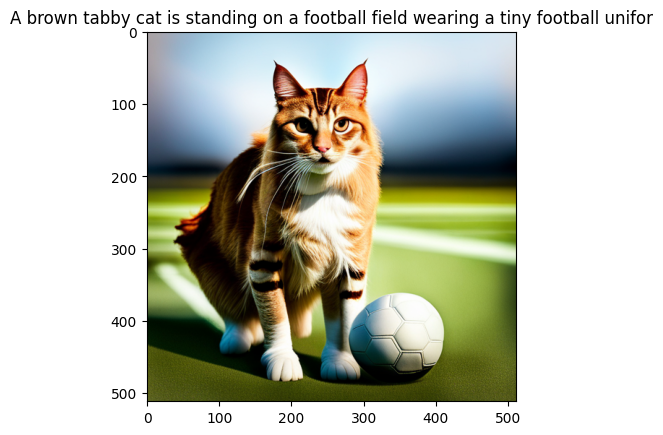

In [100]:
output = mrkl.run("Create an image of a cat playing football")


In [101]:
output = mrkl.run("Create an image of a cat playing football")




> Entering new AgentExecutor chain...
 Question: Create an image of a cat playing football
Thought: I should generate a detailed prompt to get the best image results
Action: generate_prompt_api
Action Input: "A cat wearing a football uniform is playing with a small football on a grass field. The cat has orange and white fur and is chasing after the football with its paws. It looks determined to catch the ball."  
Observation:  A portrait view of an orange tabby cat wearing a miniature blue and white football uniform, consisting of a blue jersey with a large white number on the front and back, and white football pants. The cat has light orange fur with white paws and belly. It is running across a lush green football field with tall blades of grass, chasing after a small white football that is bouncing a few feet in front of it. The cat has an intense, determined facial expression and is leaning forward with its front paws outstretched, tail stuck straight up in concentration, as it tr



> Entering new AgentExecutor chain...
 Question: Create an image of a cat playing football
Thought: I should generate a prompt first to get the details right
Action: generate_prompt_api 
Action Input: "An orange tabby cat is running across a football field, dressed in a tiny football uniform. It has a football tucked under one paw and is racing towards the end zone, tongue lolling out to one side as it concentrates hard on scoring a touchdown. On the sidelines, a group of dogs are cheering it on!"
Observation:  An orange tabby cat is running across a football field, the green grass freshly mowed, towards the yellow end zone markers. It has tucked a tiny brown football under its right front paw and is racing forward with intense focus and determination, its pink tongue lolling lazily out to one side. Small nit tails streams behind it as its legs and paws stretch out with each bounding step. On the sidelines, a pack of dogs of various breeds sit or stand watching excitedly, their tails

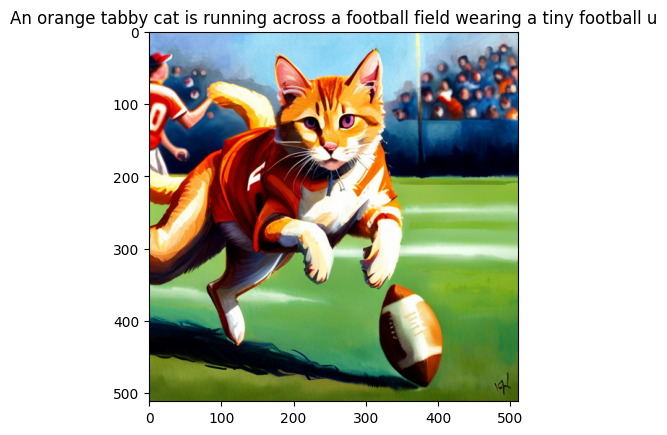

In [102]:
output = mrkl.run("Create an image of a cat playing football")




> Entering new AgentExecutor chain...
 Question: Create an image of a cat playing football
Thought: I should generate a prompt describing the scene
Action: generate_prompt_api
Action Input: "A calico cat wearing a football uniform and holding a football in its paws. It is running across a football field towards the end zone. The sun is shining brightly overhead." 
Observation:  A photorealistic artistic rendering of a smiling calico cat wearing a red football uniform with white accents and numbered jersey running across a football field towards the end zone with a football held securely in its front paws under the bright afternoon sun. The green grass on the field is freshly cut and the yellow lines are clearly visible. Wooden bleachers filled with cheering animal fans line one side of the field. Fluffy white clouds float in the crisp blue sky above.
Thought: Question: Create an image of a cat playing football
Thought: I need to describe the scene so the AI understands what to genera

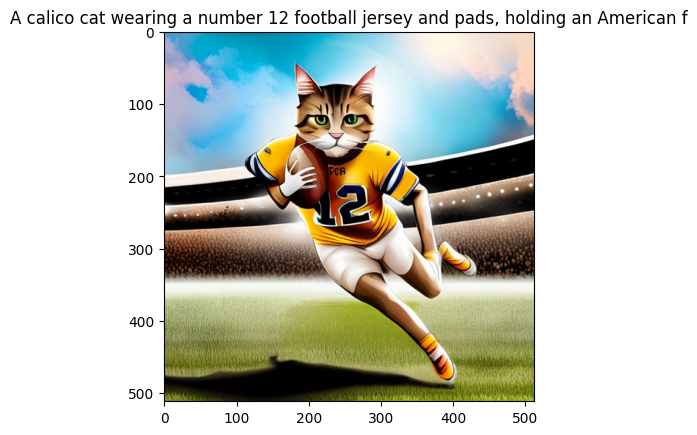

In [103]:
output = mrkl.run("Create an image of a cat playing football")


In [105]:
output = mrkl.run("Create an image of a cat playing football")




> Entering new AgentExecutor chain...
 Question: Create an image of a cat playing football
Thought: I should generate a detailed prompt to describe the scene before generating the image
Action: generate_prompt_api
Action Input: "A tabby cat wearing a red and blue football jersey is chasing after a ball on a grass field. It is using its paws to balance the ball and its tail is straight up in excitement. In the background are football goal posts."  
Observation:  A photo-realistic digital painting of a tabby cat wearing a red and blue football jersey with the number 9 on the chest, sporting a black and white striped neck collar. It is in a squatting position on a bright green grass field, using its front paws to balance a brown football upright while looking intensely at the ball. Its tail is straight up and curved at the tip, showing its excitement and focus. In the background are white goal posts on either side of the field against a blue sky with puffy white clouds. Tall trees line 



> Entering new AgentExecutor chain...
 Here is an attempt to answer the question using the tools provided:

Question: Create an image of a cat playing football  
Thought: I should try to generate a detailed prompt first to try and get a high quality image
Action: generate_prompt_api
Action Input: "A cute orange tabby cat is playing with a small soccer ball in a backyard. The cat has the ball in its paws and is about to kick it with its hind legs. It has a look of intense concentration on its face as it focuses on the ball. In the background is a wooden fence and some trees."
Observation:  A cartoon illustration of a cute orange tabby cat playing with a small soccer ball in a backyard. The cat has the ball in its paws and is about to kick it with its hind legs. It has an intense look of concentration on its face as it focuses on controlling the ball. In the background, a wooden picket fence and trees can be seen. The art style is cheerful and colorful.
Thought: The prompt generated a 

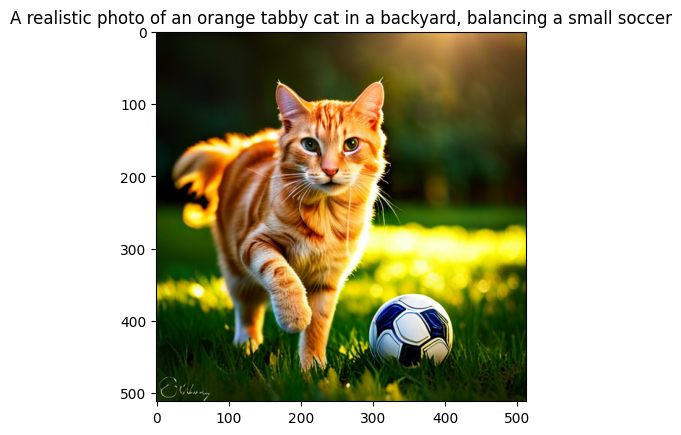

In [104]:
output = mrkl.run("Create an image of a cat playing football")


In [46]:
mrkl.agent.llm_chain.prompt.template

'Answer the following questions as best you can. You have access to the following tools:\n\ngenerate_image_api: generate_image_api(query: str) -> str - Useful for when you need to generate an image.\n\nUse the following format:\n\nQuestion: the input question you must answer\nThought: you should always think about what to do\nAction: the action to take, should be one of [generate_image_api]\nAction Input: the input to the action\nObservation: the result of the action\n... (this Thought/Action/Action Input/Observation can repeat N times)\nThought: I now know the final answer\nFinal Answer: the final answer to the original input question\n\nBegin!\n\nQuestion: {input}\nThought:{agent_scratchpad}'

In [70]:
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain.output_parsers import CommaSeparatedListOutputParser


prompt_template = """Give me one good and detailed prompt to generate the image using Stable Diffusion for {query}. The result should just include the prompt. No explanation. Example: <example>H: Give me one good and detailed prompt to generate the image using Stable Diffusion for an animal swimming in a lake. \n\n A: A photo of a brown bear swimming through a large, clear blue mountain lake surrounded by tall evergreen trees and snow capped mountains in the background. The bear is mid-stroke, with its head above the water and its front legs extended. Sparkling sunlight reflects off the smooth water. The image is sharply focused and highly detailed.</example>"""
llm_chain = LLMChain(
        llm=llm,
        prompt=PromptTemplate.from_template(prompt_template),

    )
def substring_after(s, delim):
    return s.partition(delim)[2]

substring_after(llm_chain.predict(query="photo of an animal swimming in a lake"), ":").strip()

"\n\nA close-up photo of a curious otter swimming in a clear, calm lake surrounded by lush green forest. The otter's wet fur glistens as sparkling sunlight reflects off the ripples in the water. Its little paws paddle through the lake as its whiskered face looks directly at the camera with curiosity. The background shows the forests and mountains surrounding the pristine alpine lake in soft focus."

In [ ]:

template = """Answer the following questions as best you can. Try to response in short sentences without explanation. Try not use a single tool repeatedly. You have access to the tools inside <tools></tools> XML tags:
<tools>
generate_image_api: generate_image_api(query: str) -> str - Useful for when you need to generate an image using Stable Diffusion with a prompt. 
generate_prompt_api: generate_prompt_api(query: str) -> str - Useful for generating a Stable Diffusion prompt. 
</tools>

Use the following format:
Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take, should be one of [generate_image_api, generate_prompt_api]
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: the final answer to the original input question

Here is an example inside <example></example> XML tags:
<example>
Question: I want to draw a nice picture of a swimming animal
Thought: Let's try to visualize the scene using the generate_prompt_api tool to generate some nice prompts from the query.
Action: generate_prompt_api
Action Input: "picture of a swimming animal"
Observation: Here is a nice prompt sentence to be used with Stable Diffusion: \n\nA photo of a deer swimming across a crystal clear blue lake surrounded by trees and mountains.
Thought: Now I have the prompt already. I can use the prompt to generate the picture using generate_image_api.
Action: generate_image_api
Action Input: "A photo of a deer swimming across a crystal clear blue lake surrounded by trees and mountains."
Observation: http://apicture.com/result.png
</example>


Begin!

Question: {input}
Thought:{agent_scratchpad}"""